<a href="https://colab.research.google.com/github/raquel1313/EvaluacionFML/blob/main/Copia_de_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Support Vector Machine

##Carga de datos

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
from google.colab import files
import pandas as pd # Importing the pandas library

uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=";") # Now pd is defined and can be used

Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022.csv


<ipython-input-2-fcaa96ee5f9c>:7: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(name, sep=";") # Now pd is defined and can be used


##Preparación de los datos

##Seleccion de variables
Seleccionamos estas variables ya que en el primer informe vimos que son las que tienen una correlacion mas fuerte con nuestra variable objetivo\
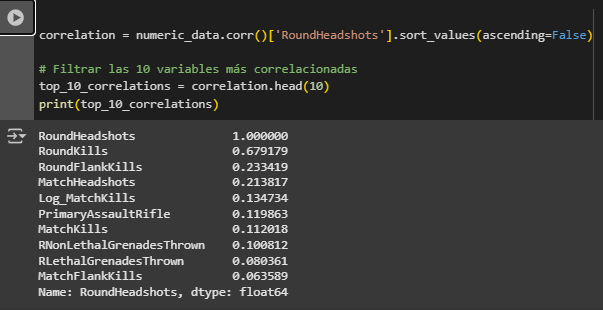

In [ ]:
# Selección de columnas
columnas = [
    'MatchKills',
    'RoundKills',
    'RoundAssists',
    'RoundFlankKills',
    'RoundStartingEquipmentValue',
    'PrimaryAssaultRifle',
    'PrimarySniperRifle',
    'RoundHeadshots'  # variable objetivo
]

df2 = df[columnas].copy()
df2.dropna(inplace=True)


In [ ]:
# Separar variables predictoras y objetivo
X = df2.drop('RoundHeadshots', axis=1)
y = df2['RoundHeadshots']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Escalar (normalizar) los datos
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()


##Creacion del modelo



In [ ]:
# Crear el modelo SVM con kernel RBF
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.1)

# Entrenar el modelo
svr_model.fit(X_train_scaled, y_train_scaled)


SVR(kernel='linear')

##Predicción y métricas

In [ ]:
# Predecir sobre el conjunto de prueba
y_pred_scaled = svr_model.predict(X_test_scaled)

# Invertir la escala de las predicciones
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_pred = y_pred.ravel()

# Evaluar con métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


MAE: 0.2834
MSE: 0.1843
RMSE: 0.4293
R²: 0.4552
